/tmp/ipython-input-8-2102862705.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_aqi_by_country.values, y=avg_aqi_by_country.index, palette='viridis')


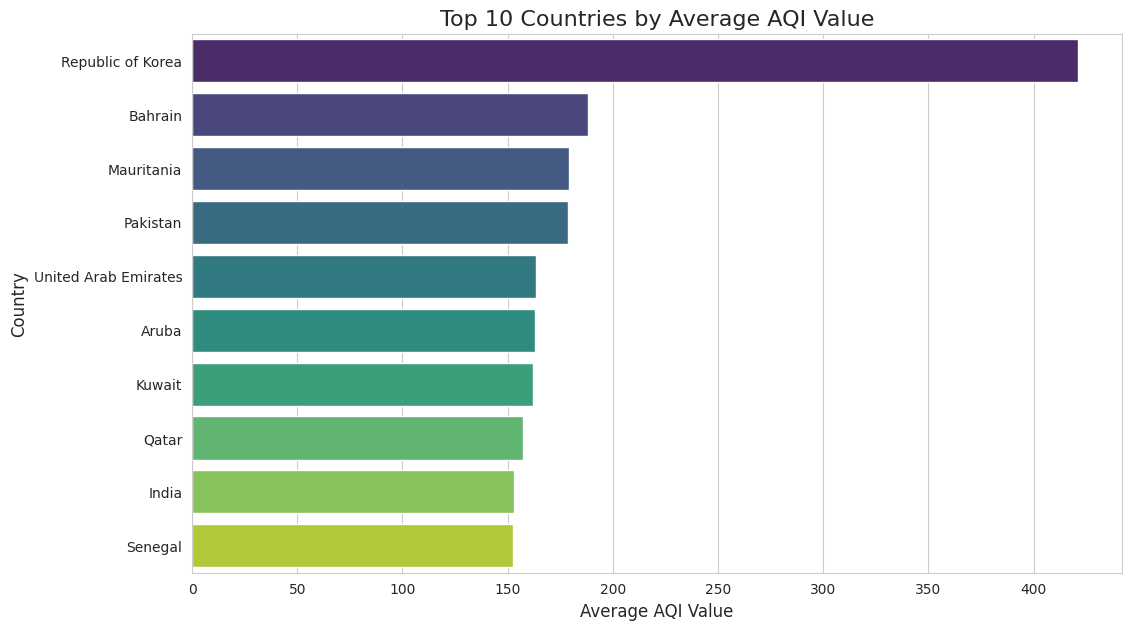

Country
Republic of Korea       421.000000
Bahrain                 188.000000
Mauritania              179.000000
Pakistan                178.788274
United Arab Emirates    163.666667
Aruba                   163.000000
Kuwait                  162.000000
Qatar                   157.500000
India                   152.964228
Senegal                 152.424242
Name: AQI Value, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_cleaned' is your cleaned DataFrame from the previous steps.
# If you are starting in a new session, you'll need to load the data first.
# For simplicity, let's load the uploaded file again.
df_cleaned = pd.read_csv('global air pollution dataset.csv')


# --- Step 1: Calculate the average AQI for each country ---
# We'll group the data by 'Country' and find the mean of the 'AQI Value' for each.
avg_aqi_by_country = df_cleaned.groupby('Country')['AQI Value'].mean().sort_values(ascending=False).head(10)


# --- Step 2: Create a bar chart ---
plt.figure(figsize=(12, 7)) # Set the figure size to make it readable
sns.barplot(x=avg_aqi_by_country.values, y=avg_aqi_by_country.index, palette='viridis')

# --- Step 3: Add titles and labels for clarity ---
plt.title('Top 10 Countries by Average AQI Value', fontsize=16)
plt.xlabel('Average AQI Value', fontsize=12)
plt.ylabel('Country', fontsize=12)

# --- Step 4: Save the plot ---
# This saves the chart as an image file.
plt.savefig('top_10_countries_by_aqi.png')

# Display the plot
plt.show()

# Display the table of the top 10 countries as well
print(avg_aqi_by_country)

/tmp/ipython-input-9-1031060212.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_aqi_by_country_best.values, y=avg_aqi_by_country_best.index, palette='coolwarm')


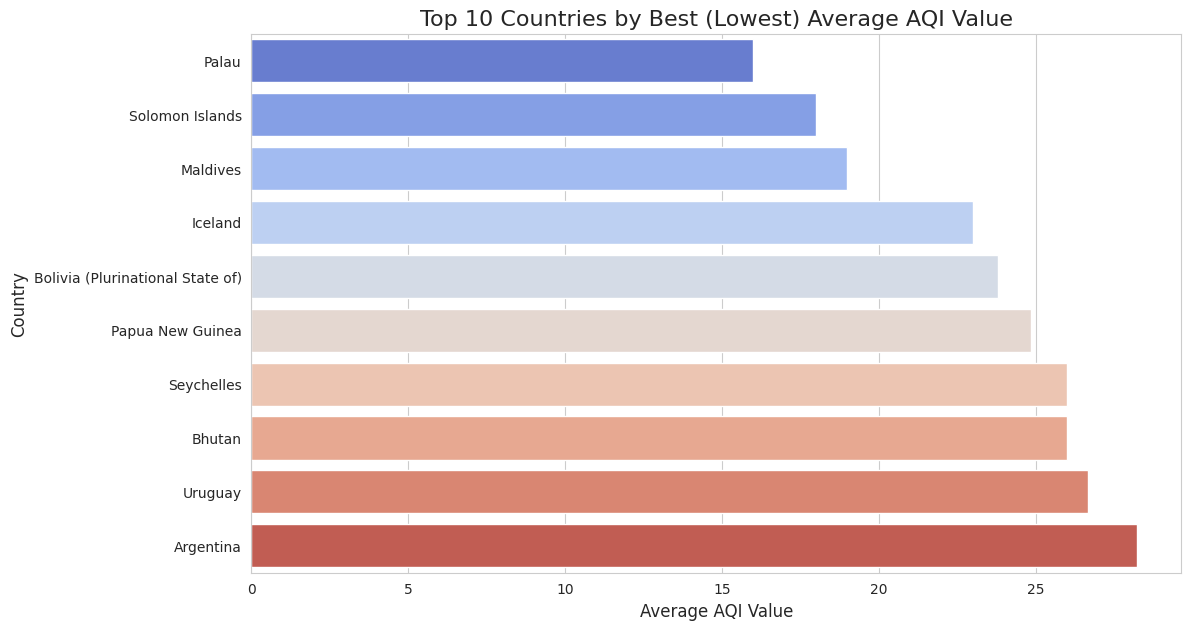

Country
Palau                               16.000000
Solomon Islands                     18.000000
Maldives                            19.000000
Iceland                             23.000000
Bolivia (Plurinational State of)    23.787879
Papua New Guinea                    24.866667
Seychelles                          26.000000
Bhutan                              26.000000
Uruguay                             26.653846
Argentina                           28.235294
Name: AQI Value, dtype: float64


In [ ]:
# --- Step 1: Calculate the average AQI for each country ---
# This time we sort in ascending order and take the top 10 (which are the lowest).
avg_aqi_by_country_best = df_cleaned.groupby('Country')['AQI Value'].mean().sort_values(ascending=True).head(10)

# --- Step 2: Create the bar chart ---
plt.figure(figsize=(12, 7))
# We use a different color palette like 'coolwarm' to distinguish from the last chart.
sns.barplot(x=avg_aqi_by_country_best.values, y=avg_aqi_by_country_best.index, palette='coolwarm')

# --- Step 3: Add titles and labels ---
plt.title('Top 10 Countries by Best (Lowest) Average AQI Value', fontsize=16)
plt.xlabel('Average AQI Value', fontsize=12)
plt.ylabel('Country', fontsize=12)

# --- Step 4: Save the plot ---
plt.savefig('top_10_countries_best_aqi.png')

# Display the plot
plt.show()

# Display the table as well
print(avg_aqi_by_country_best)

/tmp/ipython-input-10-1491405224.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='AQI Category', order=category_order, palette='mako')


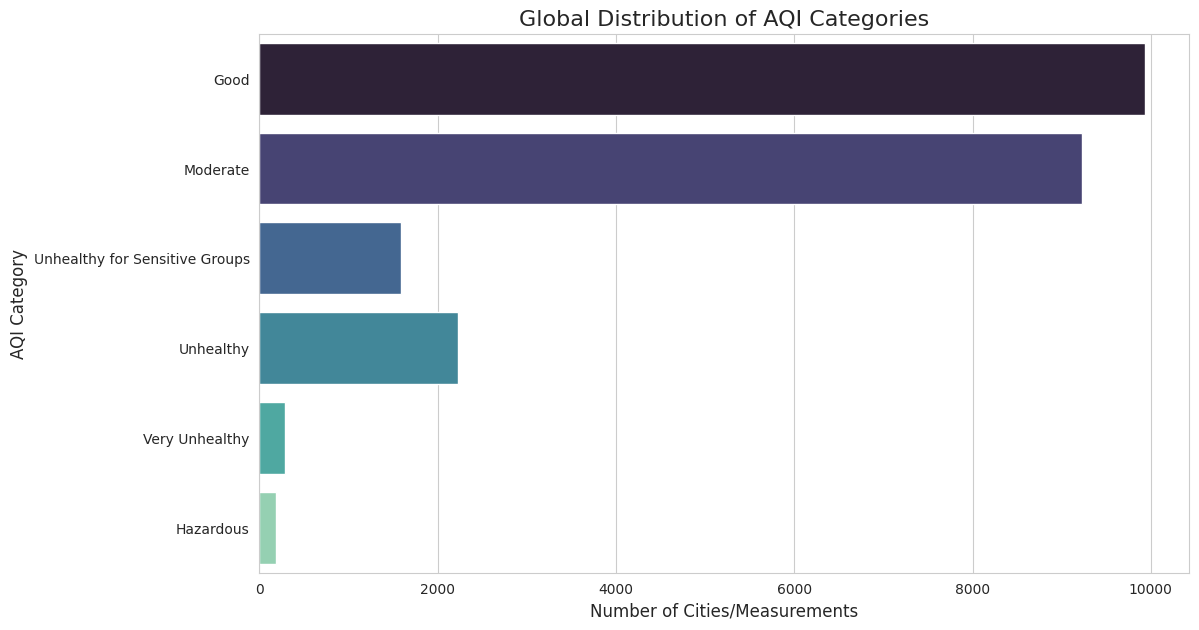

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded file again to ensure we have the category column
df = pd.read_csv('global air pollution dataset.csv')

# --- Step 1: Create the count plot ---
plt.figure(figsize=(12, 7))

# Define a logical order for the categories
category_order = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']

# Create the plot using seaborn's countplot
sns.countplot(data=df, y='AQI Category', order=category_order, palette='mako')


# --- Step 2: Add titles and labels ---
plt.title('Global Distribution of AQI Categories', fontsize=16)
plt.xlabel('Number of Cities/Measurements', fontsize=12)
plt.ylabel('AQI Category', fontsize=12)


# --- Step 3: Save the plot ---
plt.savefig('aqi_category_distribution.png')


# Display the plot
plt.show()

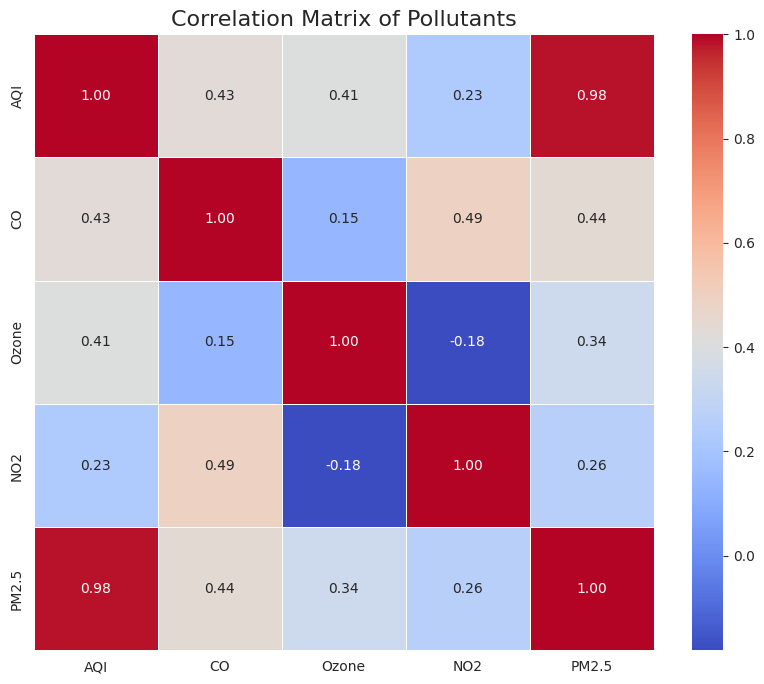

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load and Clean the Data ---
# Load the data from the uploaded file to ensure it's fresh
df = pd.read_csv('global air pollution dataset.csv')

# Select only the columns we need
df_cleaned = df[['Country', 'City', 'AQI Value', 'CO AQI Value',
                 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].copy()

# Rename the columns for easier use
df_cleaned.rename(columns={
    'AQI Value': 'AQI',
    'CO AQI Value': 'CO',
    'Ozone AQI Value': 'Ozone',
    'NO2 AQI Value': 'NO2',
    'PM2.5 AQI Value': 'PM2.5'
}, inplace=True)

# --- Step 2: Create the Correlation Heatmap ---
# Now that we know df_cleaned is ready, we calculate the correlation
correlation_matrix = df_cleaned[['AQI', 'CO', 'Ozone', 'NO2', 'PM2.5']].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Pollutants', fontsize=16)

# --- Step 3: Save and Display the Plot ---
plt.savefig('pollutant_correlation_heatmap.png')
plt.show()

In [ ]:
df_cleaned.to_csv('cleaned_air_pollution_data.csv', index=False)

In [1]:
import pandas as pd
from google.colab import files
import io

# --- Part 1: Upload the File ---
# This avoids the HTTPError and FileNotFoundError.
print("Please choose the 'GlobalAirPollution.csv' file you downloaded.")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
print("\nFile uploaded successfully!")


# --- Part 2: Clean the Data with the Correct Column Names ---
# This avoids the KeyError.
print("Cleaning the data...")
# Select the correct columns
df_cleaned = df[['Country', 'City', 'AQI Value', 'CO AQI Value',
                 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']].copy()

# Rename the columns
df_cleaned.rename(columns={
    'AQI Value': 'AQI',
    'CO AQI Value': 'CO',
    'Ozone AQI Value': 'Ozone',
    'NO2 AQI Value': 'NO2',
    'PM2.5 AQI Value': 'PM2.5'
}, inplace=True)


# --- Part 3: Show the Final, Cleaned Data ---
print("\nData is clean and ready! Here are the first 5 rows:")
df_cleaned.head()

Please choose the 'GlobalAirPollution.csv' file you downloaded.


Saving global air pollution dataset.csv to global air pollution dataset.csv

File uploaded successfully!
Cleaning the data...

Data is clean and ready! Here are the first 5 rows:


,Country,City,AQI,CO,Ozone,NO2,PM2.5
0,Russian Federation,Praskoveya,51,1,36,0,51
1,Brazil,Presidente Dutra,41,1,5,1,41
2,Italy,Priolo Gargallo,66,1,39,2,66
3,Poland,Przasnysz,34,1,34,0,20
4,France,Punaauia,22,0,22,0,6
